# MODELIZACIÓN CLASIFICACIÓN PROBABILITY OF DEFAULT (PD)

consideraciones previas: 
- para este modelo de clasificacion se usará el algoritmo de regresion logistica debido a que es muy usado en el ambito de riesgo crediticio.

## IMPORTAR PAQUETES

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import plot_precision_recall_curve
import scikitplot as skplt
from yellowbrick.classifier import discrimination_threshold

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

In [15]:
ruta_proyecto = 'C:/Users/mig_g/OneDrive/PROYECTOS_MIGUEL/SCORING_RIESGOS'
ruta_proyecto

'C:/Users/mig_g/OneDrive/PROYECTOS_MIGUEL/SCORING_RIESGOS'

Nombres de los ficheros de datos.

In [16]:
nombre = 'df_tablon_pd.pickle'

Cargar los datos.

In [17]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre)

In [18]:
x = df.drop(columns='target_pd')
y = df.target_pd

## MODELIZAR

### Reservar el dataset de validacion

In [19]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

In [20]:
pipe = Pipeline([('algoritmo',LogisticRegression())])

grid = [{'algoritmo': [LogisticRegression(solver = 'saga', n_jobs=-1)],
         'algoritmo__penalty': ['elasticnet', 'l1', 'l2'], # competir estos 3 parametros de regularizacion
         'algoritmo__C': [0,0.25,0.5,0.75,1]}
       ]

### Optimizar los hiper parámetros

En este caso se usara grid search

####  Con grid search

In [21]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 5, 
                           scoring = 'roc_auc', # metrica de evaluacion
                           verbose = 0,
                           n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

In [22]:
salida = pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score').reset_index(drop=True).head(5)
salida

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__C,param_algoritmo__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.54,0.32,0.01,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",1,l1,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.70,0.69,0.70,0.71,0.71,0.70,0.01,1
1,13.48,0.26,0.01,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",0.75,l1,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.70,0.69,0.70,0.71,0.71,0.70,0.01,2
2,8.66,0.76,0.01,0.01,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",1,l2,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.70,0.69,0.70,0.71,0.71,0.70,0.01,3
3,10.86,0.31,0.01,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",0.75,l2,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.70,0.69,0.70,0.71,0.71,0.70,0.01,4
4,12.80,0.88,0.02,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",0.50,l1,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.70,0.69,0.70,0.71,0.71,0.70,0.01,5


Se observa que los resultados del auc es el mismo en todas las primeras configuraciones.

Se reentrena el modelo con esa configuración.

In [23]:
modelo.best_estimator_ # objeto con mejor modelo y combinacion de parametros

Pipeline(steps=[('algoritmo',
                 LogisticRegression(C=1, n_jobs=-1, penalty='l1',
                                    solver='saga'))])

In [24]:
modelo.best_params_ # diccionario con informacion de mejor modelo y combinacion de parametros

{'algoritmo': LogisticRegression(C=1, n_jobs=-1, penalty='l1', solver='saga'),
 'algoritmo__C': 1,
 'algoritmo__penalty': 'l1'}

**OBTENER EL MEJOR MODELO Y SUS PARAMETROS ES LO QUE IMPORTA DE ESTE NOTEBOOK**

In [25]:
#Instanciar
rl = LogisticRegression(solver = 'saga', n_jobs=-1, C = 1, penalty = 'l1')

#Entrenar
rl.fit(train_x,train_y)

LogisticRegression(C=1, n_jobs=-1, penalty='l1', solver='saga')

Se puede revisar los coefecientes para ver los que son cero y las variables más importantes.

In [27]:
rl.coef_

array([[-0.30657342, -0.06055936,  0.05708382, -0.218131  , -0.06220233,
         0.05673392, -0.0573404 , -0.0727052 ,  0.06293447,  0.0609144 ,
        -0.0290123 ,  0.13180155, -0.0032644 ,  0.22511238, -0.08507493,
        -0.00963939,  0.31913425,  0.        , -0.23644417,  0.        ,
        -0.00748168,  0.75772906,  0.        ,  0.        , -0.97501977,
        -0.04081391,  1.55175254,  1.31603629, -1.31887936, -2.49714385,
         1.94218618,  0.16232383]])

In [30]:
rl.feature_names_in_

array(['ingresos_verificados_Not Verified',
       'ingresos_verificados_Source Verified',
       'ingresos_verificados_Verified', 'vivienda_MORTGAGE',
       'vivienda_OWN', 'vivienda_RENT', 'finalidad_car',
       'finalidad_credit_card', 'finalidad_debt_consolidation',
       'finalidad_home_improvement', 'finalidad_house',
       'finalidad_major_purchase', 'finalidad_medical',
       'finalidad_moving', 'finalidad_other', 'finalidad_otros',
       'finalidad_small_business', 'finalidad_vacation',
       'num_cuotas_ 36 months', 'num_cuotas_ 60 months',
       'antigüedad_empleo_oe', 'rating_oe', 'antigüedad_empleo_oe_mms',
       'rating_oe_mms', 'ingresos_mms', 'dti_mms',
       'num_lineas_credito_mms', 'porc_uso_revolving_mms',
       'principal_mms', 'tipo_interes_mms', 'imp_cuota_mms',
       'num_derogatorios_bin'], dtype=object)

In [56]:
# coeficientes = pd.DataFrame(data = rl.coef_, columns = rl.feature_names_in_).stack()
# coeficientes[0]

In [65]:
coeficientes = pd.DataFrame(data = rl.coef_, columns = rl.feature_names_in_).stack().droplevel(level = 0).sort_values()
coeficientes

tipo_interes_mms                       -2.50
principal_mms                          -1.32
ingresos_mms                           -0.98
ingresos_verificados_Not Verified      -0.31
num_cuotas_ 36 months                  -0.24
vivienda_MORTGAGE                      -0.22
finalidad_other                        -0.09
finalidad_credit_card                  -0.07
vivienda_OWN                           -0.06
ingresos_verificados_Source Verified   -0.06
finalidad_car                          -0.06
dti_mms                                -0.04
finalidad_house                        -0.03
finalidad_otros                        -0.01
antigüedad_empleo_oe                   -0.01
finalidad_medical                      -0.00
rating_oe_mms                           0.00
num_cuotas_ 60 months                   0.00
antigüedad_empleo_oe_mms                0.00
finalidad_vacation                      0.00
vivienda_RENT                           0.06
ingresos_verificados_Verified           0.06
finalidad_

## EVALUAR

### Predecir sobre validación

In [60]:
pred = rl.predict_proba(val_x)[:, 1]

### Evaluar sobre validación

In [61]:
roc_auc_score(val_y, pred)

0.7014564076100019

## REPORTING DEL MODELO

### Gain Chart

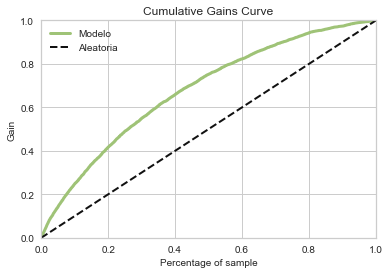

In [62]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
plt.legend(labels = ['Modelo','Aleatoria']);

### Lift Chart

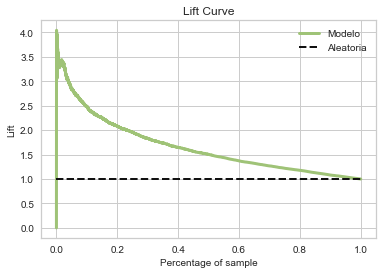

In [63]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
plt.legend(labels = ['Modelo','Aleatoria']);

### ROC Chart

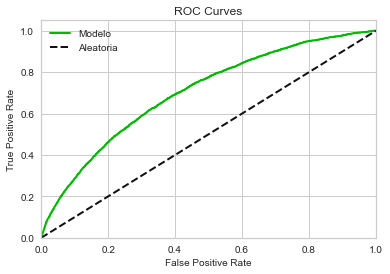

In [64]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
del ax.lines[1] 
del ax.lines[1]
plt.legend(labels = ['Modelo','Aleatoria']);